In [3]:
import pandas as pd

df = pd.read_csv("002_results_dev_test.csv")
df.shape


(78, 6)

In [4]:
78/13

6.0

In [5]:
df["epoch"] = [3,3,5,5,7,7,9,9,11,11,13,13,15,15,18,18,22,22,33, 33, 40,44,45, 45,50, 50] * 3


In [6]:

df.to_csv("002_results_dev_test.csv", index=False)

In [7]:
df.head(2)

,macroF1,y_true,y_pred,eval_split,model_name,epoch
0,0.791534,"['Neutral', 'Positive', 'Neutral', 'Positive',...","['Neutral', 'Positive', 'Negative', 'Positive'...",dev,classla/bcms-bertic,3
1,0.792694,"['Negative', 'Negative', 'Negative', 'Positive...","['Negative', 'Negative', 'Negative', 'Positive...",test,classla/bcms-bertic,3


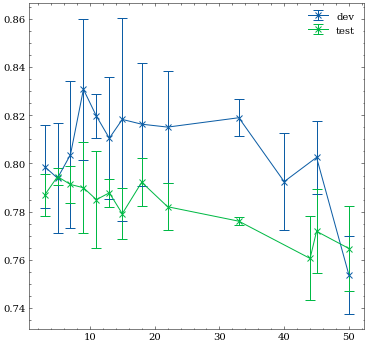

In [8]:
import matplotlib.pyplot as plt

plt.style.use("science no-latex".split())
plt.figure(figsize=(6, 6))
for split in ["dev", "test"]:
    import numpy as np

    gb = df[df.eval_split == split].groupby("epoch").agg([np.mean, np.std])
    plt.errorbar(
        gb.index,
        gb[("macroF1", "mean")],
        yerr=gb[("macroF1", "std")],
        label=split,
        capsize=5,
        fmt="-x"
    )
plt.legend()
plt.show()


In [9]:
gb

macroF1          
           mean       std
epoch                    
3      0.786849  0.008617
5      0.794549  0.003541
7      0.791288  0.007869
9      0.789944  0.018806
11     0.784999  0.019990
13     0.787823  0.005759
15     0.779151  0.010613
18     0.792210  0.009911
22     0.782053  0.009796
33     0.776059  0.001717
44     0.760616  0.017443
45     0.771868  0.017344
50     0.764728  0.017463

In [6]:
import pandas as pd

with open("002_results_dev_test_csebert.jsonl", "r") as f:
    contents = f.readlines()
from ast import literal_eval
contents = [literal_eval(i) for i in contents]

df = pd.DataFrame(data=contents)

In [7]:
df.shape

(73, 6)

In [8]:
from sklearn.metrics import f1_score

df["macroF1"] = df.apply(
    lambda row: f1_score(row["y_true"],
    row["y_pred"], average="macro", labels = "Positive Negative Neutral".split()
    ), axis=1
)
df.head()

,macroF1,y_true,y_pred,eval_split,model_name,epoch
0,0.851509,"[Neutral, Positive, Neutral, Positive, Neutral...","[Neutral, Positive, Negative, Positive, Neutra...",dev,EMBEDDIA/crosloengual-bert,3
1,0.772820,"[Negative, Negative, Negative, Positive, Negat...","[Negative, Negative, Negative, Positive, Negat...",test,EMBEDDIA/crosloengual-bert,3
2,0.817778,"[Neutral, Positive, Neutral, Positive, Neutral...","[Neutral, Positive, Negative, Positive, Neutra...",dev,EMBEDDIA/crosloengual-bert,5
3,0.756204,"[Negative, Negative, Negative, Positive, Negat...","[Negative, Negative, Negative, Positive, Negat...",test,EMBEDDIA/crosloengual-bert,5
4,0.828294,"[Neutral, Positive, Neutral, Positive, Neutral...","[Neutral, Positive, Negative, Positive, Neutra...",dev,EMBEDDIA/crosloengual-bert,7


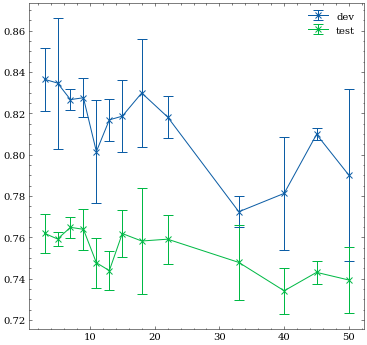

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("science no-latex".split())
plt.figure(figsize=(6, 6))
for split in ["dev", "test"]:
    import numpy as np

    gb = df[df.eval_split == split].groupby("epoch").agg([np.mean, np.std])
    plt.errorbar(
        gb.index,
        gb[("macroF1", "mean")],
        yerr=gb[("macroF1", "std")],
        label=split,
        capsize=5,
        fmt="-x"
    )
plt.legend()
plt.show()


In [10]:
df.groupby("eval_split,epoch".split(",")).agg([np.mean, np.std])

macroF1          
                      mean       std
eval_split epoch                    
dev        3      0.836484  0.015212
           5      0.834692  0.031676
           7      0.826683  0.005005
           9      0.827573  0.009424
           11     0.801535  0.025100
           13     0.816884  0.010207
           15     0.818659  0.017515
           18     0.829877  0.026008
           22     0.818271  0.010136
           33     0.772422  0.007619
           40     0.781304  0.027464
           45     0.809853  0.002849
           50     0.790091  0.041500
test       3      0.761964  0.009272
           5      0.759246  0.003601
           7      0.764883  0.005211
           9      0.763925  0.009870
           11     0.747749  0.012099
           13     0.743947  0.009318
           15     0.761871  0.011156
           18     0.758265  0.025791
           22     0.759150  0.011897
           33     0.747902  0.018017
           40     0.734175  0.011258
           45     0.743095  0.005429
           50     0.739391  0.016079

In [14]:
10*np.log10((0.761964)/(0.764883))

-0.016605555594379408

In [23]:
import pandas as pd

with open("002_results_dev_test_xlmrobertabase2.jsonl", "r") as f:
    contents = f.readlines()
from ast import literal_eval
contents = [literal_eval(i) for i in contents]

df = pd.DataFrame(data=contents)

from sklearn.metrics import f1_score

df["macroF1"] = df.apply(
    lambda row: f1_score(row["y_true"],
    row["y_pred"], average="macro", labels = "Positive Negative Neutral".split()
    ), axis=1
)
df.head()

,macroF1,y_true,y_pred,eval_split,model_name,epoch
0,0.224189,"[Neutral, Positive, Neutral, Positive, Neutral...","[Negative, Negative, Negative, Negative, Negat...",dev,xlm-roberta-base,3
1,0.226138,"[Negative, Negative, Negative, Positive, Negat...","[Negative, Negative, Negative, Negative, Negat...",test,xlm-roberta-base,3
2,0.503704,"[Neutral, Positive, Neutral, Positive, Neutral...","[Neutral, Neutral, Negative, Neutral, Neutral,...",dev,xlm-roberta-base,5
3,0.570869,"[Negative, Negative, Negative, Positive, Negat...","[Negative, Negative, Negative, Neutral, Negati...",test,xlm-roberta-base,5
4,0.224189,"[Neutral, Positive, Neutral, Positive, Neutral...","[Negative, Negative, Negative, Negative, Negat...",dev,xlm-roberta-base,7


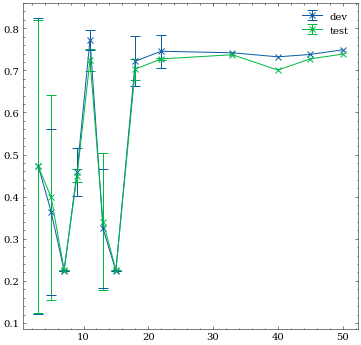

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("science no-latex".split())
plt.figure(figsize=(6, 6))
for split in ["dev", "test"]:
    import numpy as np

    gb = df[df.eval_split == split].groupby("epoch").agg([np.mean, np.std])
    plt.errorbar(
        gb.index,
        gb[("macroF1", "mean")],
        yerr=gb[("macroF1", "std")],
        label=split,
        capsize=5,
        fmt="-x"
    )
plt.legend()
plt.show()
